Table of Contents

[Loading Data](#loaddata)

[Describe Dataset](#describe)

[Missing Data](#missingdata)

[Label encoding and One hot encoding](#encoding)

[Duplicates](#duplicate)

[Plot Histograms](#hist)

[Outliers](#outliers)


In [7]:
import pandas as pd
from numpy import nan
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [8]:
pd.options.display.max_rows=200

<a id="loaddata"></a>

# Load Data

In [9]:
heart = pd.read_csv("data/heart.csv")
nfl = pd.read_csv("data/NFL-Play-By-Play-2009-2017.csv")

/home/neeraj/miniconda3/envs/ml-with-python/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (25,51) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [10]:
# Check first 5 rows of the dataframe

heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
# Check datatypes of the colmns

heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [56]:
nfl.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 102 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Date                         150000 non-null  object 
 1   GameID                       150000 non-null  int64  
 2   Drive                        150000 non-null  int64  
 3   qtr                          150000 non-null  int64  
 4   down                         127572 non-null  float64
 5   time                         149920 non-null  object 
 6   TimeUnder                    150000 non-null  int64  
 7   TimeSecs                     149920 non-null  float64
 8   PlayTimeDiff                 149840 non-null  float64
 9   SideofField                  149809 non-null  object 
 10  yrdln                        149695 non-null  float64
 11  yrdline100                   149695 non-null  float64
 12  ydstogo                      150000 non-null  int64  
 13

<a id = "describe"></a>

# Describe
Describe() method generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.This method deals with only numeric columns. To look for categorical variables as well use include="all".

count - tells count of the columns or tells number of non empty rows 

mean - mean of the column 

std - standard deviation of the column 

min - minimum value of the column 

25% - 25th percentile/quarter that is median of first and second quarter of numbers 

50% - median of numbers that is median of second and third quarter

75% - 75th percentile/quarter that is median of third and fourth quarter 

max - maximum value of the column


In [12]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
nfl = nfl[:150000]
nfl.shape
nfl.to_csv('NFL-Play-By-Play-2009-2017.csv')

<a id="missingdata"></a>

# Missing Data

Missing data means NaN/ null values for columns and rows i.e unknown data.
We need to treat this data by either of the ways because most of the predictive 
modelling techniques cannot handle missing values.

1. Drop rows and columns containing null values (not recommended)
2. Fill with zeros
3. Forward fill
4. Backward fill
5. Impute data either by mean or median

Lets see how to find out nulls in data.

In [14]:
nfl.isnull().sum()

Date                                0
GameID                              0
Drive                               0
qtr                                 0
down                            22428
time                               80
TimeUnder                           0
TimeSecs                           80
PlayTimeDiff                      160
SideofField                       191
yrdln                             305
yrdline100                        305
ydstogo                             0
ydsnet                              0
GoalToGo                          305
FirstDown                       10514
posteam                          9214
DefensiveTeam                    9214
desc                                2
PlayAttempted                       0
Yards.Gained                        0
sp                                  0
Touchdown                           0
ExPointResult                  146272
TwoPointConv                   149819
DefTwoPoint                    150000
Safety      

In [15]:
missing_val = nfl.isnull().mean()*100

In [16]:
missing_val_df = pd.DataFrame([nfl.columns,missing_val]).T

In [17]:
missing_val_df.columns=['Columns', 'Missing_Percent']
missing_val_df.head()

,Columns,Missing_Percent
0,Date,0
1,GameID,0
2,Drive,0
3,qtr,0
4,down,14.952


In [18]:
# We can see there are lot of columns which are null. There are 30 columns where more than 40% data is missing.
# It is extremely difficult to fill so much missing data.
# Lets try first startegy of deleting all rows and columns having missing data.
nfl.dropna()

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA,Season


Oops! this deleted whole dataset. That means in our dataset every row and column has missing data.
Definitely we cannot go with approach.
But knowing the fact that we cannot fill so much missing values, we need to take a threshold and columns 
having missing values more than the threshold should be removed.

In this example we are keeping threshold as 60, that means all columns where data is missing for more than 60% can be dropped.


In [19]:
# Get column names where missing values are more than 60%.

cols_to_drop = missing_val_df[missing_val_df['Missing_Percent'] > 60]['Columns']
cols_to_drop

23         ExPointResult
24          TwoPointConv
25           DefTwoPoint
28            PuntResult
40           Interceptor
41                Rusher
44           RunLocation
45                RunGap
46              Receiver
49          ReturnResult
50              Returner
51        BlockingPlayer
53              Tackler2
54       FieldGoalResult
55     FieldGoalDistance
57           RecFumbTeam
58         RecFumbPlayer
61      ChalReplayResult
63         PenalizedTeam
64           PenaltyType
65       PenalizedPlayer
91                airEPA
92                yacEPA
99                airWPA
100               yacWPA
Name: Columns, dtype: object

In [20]:
# Drop all the columns having null values more than 60%

nfl_tranformed = nfl.drop(list(cols_to_drop), axis=1)

In [21]:
# Column numbers reduced to 77 from 102.

nfl_tranformed.shape

(150000, 77)

In [22]:
# Lets see again the missing values
nfl_tranformed.isnull().mean() * 100

Date                            0.000000
GameID                          0.000000
Drive                           0.000000
qtr                             0.000000
down                           14.952000
time                            0.053333
TimeUnder                       0.000000
TimeSecs                        0.053333
PlayTimeDiff                    0.106667
SideofField                     0.127333
yrdln                           0.203333
yrdline100                      0.203333
ydstogo                         0.000000
ydsnet                          0.000000
GoalToGo                        0.203333
FirstDown                       7.009333
posteam                         6.142667
DefensiveTeam                   6.142667
desc                            0.001333
PlayAttempted                   0.000000
Yards.Gained                    0.000000
sp                              0.000000
Touchdown                       0.000000
Safety                          0.000000
Onsidekick      

In [23]:
# Backward and forward fill. Backward fill and forward fill fails to 
# fill missing values for last and first missing values respectively.
# For example backward fill for nfl_tranformed['PosTeamScore'] will left one null value 
# which is the last column.
nfl_tranformed['PosTeamScore'].tail(2)

149998    0.0
149999    0.0
Name: PosTeamScore, dtype: float64

In [24]:
nfl_tranformed.bfill() # default axis = 0 i.e row wise value of next row will be filled for previous row.
# axis = 1 value of next column will be filled for previous column value.

,Date,GameID,Drive,qtr,down,time,TimeUnder,TimeSecs,PlayTimeDiff,SideofField,...,TwoPoint_Prob,ExpPts,EPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,Season
0,2009-09-10,2009091000,1,1,1.0,15:00,15,3600.0,0.0,TEN,...,0.0,0.323526,2.014474,0.485675,0.514325,0.546433,0.453567,0.485675,0.060758,2009
1,2009-09-10,2009091000,1,1,1.0,14:53,15,3593.0,7.0,PIT,...,0.0,2.338000,0.077907,0.546433,0.453567,0.551088,0.448912,0.546433,0.004655,2009
2,2009-09-10,2009091000,1,1,2.0,14:16,15,3556.0,37.0,PIT,...,0.0,2.415907,-1.402760,0.551088,0.448912,0.510793,0.489207,0.551088,-0.040295,2009
3,2009-09-10,2009091000,1,1,3.0,13:35,14,3515.0,41.0,PIT,...,0.0,1.013147,-1.712583,0.510793,0.489207,0.461217,0.538783,0.510793,-0.049576,2009
4,2009-09-10,2009091000,1,1,4.0,13:27,14,3507.0,8.0,PIT,...,0.0,-0.699436,2.097796,0.461217,0.538783,0.558929,0.441071,0.461217,0.097712,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,2012-10-14,2012101409,3,1,1.0,06:46,7,3106.0,41.0,SF,...,0.0,0.954889,0.548962,0.522726,0.477274,0.539449,0.460551,0.522726,0.016724,2012
149996,2012-10-14,2012101409,3,1,2.0,06:02,7,3062.0,44.0,SF,...,0.0,1.503851,-0.851613,0.539449,0.460551,0.514007,0.485993,0.539449,-0.025442,2012
149997,2012-10-14,2012101409,3,1,3.0,05:57,6,3057.0,5.0,SF,...,0.0,0.652238,1.568839,0.514007,0.485993,0.560933,0.439067,0.514007,0.046926,2012
149998,2012-10-14,2012101409,3,1,1.0,05:24,6,3024.0,33.0,SF,...,0.0,2.221077,-0.678705,0.560933,0.439067,0.539921,0.460079,0.560933,-0.021013,2012


In [25]:
nfl_tranformed['Passer'].tail()

149995    A.Smith
149996    A.Smith
149997    A.Smith
149998    A.Smith
149999        NaN
Name: Passer, dtype: object

In [26]:
nfl_tranformed.bfill().ffill().isnull().sum()

Date                           0
GameID                         0
Drive                          0
qtr                            0
down                           0
time                           0
TimeUnder                      0
TimeSecs                       0
PlayTimeDiff                   0
SideofField                    0
yrdln                          0
yrdline100                     0
ydstogo                        0
ydsnet                         0
GoalToGo                       0
FirstDown                      0
posteam                        0
DefensiveTeam                  0
desc                           0
PlayAttempted                  0
Yards.Gained                   0
sp                             0
Touchdown                      0
Safety                         0
Onsidekick                     0
PlayType                       0
Passer                         0
Passer_ID                      0
PassAttempt                    0
PassOutcome                    0
PassLength

## Imputation

Imputation means using some model for replacing missing values. They can be:

1. Replacing values with some constant depends upon the domain.

2. Replacing with some random value from some other row.

3. Replacing the values with mean, median or mode values.

4. Predicting values using some other model.


Lets take one example and observe the changes.


In [27]:
# Mean of column down is
nfl_tranformed['down'].mean()

2.005683065249428

In [28]:
nfl_tranformed['down'].head(40)

0     NaN
1     1.0
2     2.0
3     3.0
4     4.0
5     1.0
6     2.0
7     3.0
8     4.0
9     1.0
10    2.0
11    1.0
12    2.0
13    3.0
14    4.0
15    1.0
16    1.0
17    1.0
18    2.0
19    3.0
20    4.0
21    1.0
22    2.0
23    3.0
24    4.0
25    1.0
26    1.0
27    1.0
28    2.0
29    3.0
30    1.0
31    2.0
32    1.0
33    2.0
34    3.0
35    1.0
36    NaN
37    2.0
38    1.0
39    2.0
Name: down, dtype: float64

In [29]:
# Simple way of replacing all missing values in column 'down' with its mean.
# Scikit-learn also has implemented class(SimpleImputer) for replacing not only null's but any value.

nfl_tranformed['down'].fillna(nfl_tranformed['down'].mean()).head(40)

0     2.005683
1     1.000000
2     2.000000
3     3.000000
4     4.000000
5     1.000000
6     2.000000
7     3.000000
8     4.000000
9     1.000000
10    2.000000
11    1.000000
12    2.000000
13    3.000000
14    4.000000
15    1.000000
16    1.000000
17    1.000000
18    2.000000
19    3.000000
20    4.000000
21    1.000000
22    2.000000
23    3.000000
24    4.000000
25    1.000000
26    1.000000
27    1.000000
28    2.000000
29    3.000000
30    1.000000
31    2.000000
32    1.000000
33    2.000000
34    3.000000
35    1.000000
36    2.005683
37    2.000000
38    1.000000
39    2.000000
Name: down, dtype: float64

In [30]:
# Using SimpleImputer
# This library works directly on numpy array. dataset['column'] gives Series of column, 
# and dataset['column'].values gives array of column values
values = nfl_tranformed['down'].values
print(type(values))
values = values.reshape(-1,1)
print(values[:41])
si = SimpleImputer(missing_values=nan, strategy='mean')
transformed_values = si.fit_transform(values)
print(transformed_values[:41])

# Your chance
# Learn about reshape
# Try for mean, median imputations for other columns.
# For median replace mean with median. 
# Note: mode is not an option in SimpleImputer

<class 'numpy.ndarray'>
[[nan]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 1.]
 [ 2.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 4.]
 [ 1.]
 [ 1.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 1.]
 [ 2.]
 [ 1.]
 [ 2.]
 [ 3.]
 [ 1.]
 [nan]
 [ 2.]
 [ 1.]
 [ 2.]
 [ 3.]]
[[2.00568307]
 [1.        ]
 [2.        ]
 [3.        ]
 [4.        ]
 [1.        ]
 [2.        ]
 [3.        ]
 [4.        ]
 [1.        ]
 [2.        ]
 [1.        ]
 [2.        ]
 [3.        ]
 [4.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [2.        ]
 [3.        ]
 [4.        ]
 [1.        ]
 [2.        ]
 [3.        ]
 [4.        ]
 [1.        ]
 [1.        ]
 [1.        ]
 [2.        ]
 [3.        ]
 [1.        ]
 [2.        ]
 [1.        ]
 [2.        ]
 [3.        ]
 [1.        ]
 [2.00568307]
 [2.        ]
 [1.        ]
 [2.        ]
 [3.        ]]


Algorithms supporting NaN values are decision tree, KNN and naive bayes. Sadly, the scikit-learn implementations of naive bayes, decision trees and k-Nearest Neighbors are not robust to missing values. Although it is being considered.

Another algorithm implementation such as xgboost is robust enough to handle missing values. We can develop our own algorithm as well to handle missing values.

<a id="encoding"></a>

# Label and One hot encoding

Label and one hot encoding are used for converting categorical or boolean values to numeric.
Explaination by an exmple.
Some dataframe has a column class and have values either "First" and "Second"
Prediction algorithms does not understand strings. So, we need to convert them in numbers by labeling each value with some number. One hot encoding will create two separate columns with name "Class_First" and "Class_Second" and assign binary values in the columns as per original column values.

In [31]:
# Create dataframe with column class
encoding = pd.DataFrame({"Values":[10,20,20,30,45,30,60],
                         "Class":["First","Second","Second","First","Second","First","First"]})
print(encoding)

   Values   Class
0      10   First
1      20  Second
2      20  Second
3      30   First
4      45  Second
5      30   First
6      60   First


In [32]:
# get_dummies method for One Hot Encoding.
encoding_ohe = pd.get_dummies(encoding)
encoding_ohe

,Values,Class_First,Class_Second
0,10,1,0
1,20,0,1
2,20,0,1
3,30,1,0
4,45,0,1
5,30,1,0
6,60,1,0


Let's understand Label Encoding
Label encoding is used when a column has more than 10 unique values. In that case rather than creating new columns for every category we consider every unique value as a label and convert them by labelling 1,2,3 and so on.


In [33]:
nfl_tranformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 77 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Date                         150000 non-null  object 
 1   GameID                       150000 non-null  int64  
 2   Drive                        150000 non-null  int64  
 3   qtr                          150000 non-null  int64  
 4   down                         127572 non-null  float64
 5   time                         149920 non-null  object 
 6   TimeUnder                    150000 non-null  int64  
 7   TimeSecs                     149920 non-null  float64
 8   PlayTimeDiff                 149840 non-null  float64
 9   SideofField                  149809 non-null  object 
 10  yrdln                        149695 non-null  float64
 11  yrdline100                   149695 non-null  float64
 12  ydstogo                      150000 non-null  int64  
 13 

In [34]:
# Get String columns
categorical_columns = nfl_tranformed.select_dtypes('object')
# Date and Time should be excluded because date and time columns are treated in different way.
# Also we can remove id columns because ids does not provide any information.
categorical_columns.columns[2:]

Index(['SideofField', 'posteam', 'DefensiveTeam', 'desc', 'PlayType', 'Passer',
       'Passer_ID', 'PassOutcome', 'PassLength', 'PassLocation', 'Rusher_ID',
       'Receiver_ID', 'Tackler1', 'HomeTeam', 'AwayTeam', 'Timeout_Team'],
      dtype='object')

In [35]:
nfl_tranformed['SideofField'] = nfl_tranformed['SideofField'].astype('str')
le = LabelEncoder()
nfl_tranformed['SideofField'] = le.fit_transform(nfl_tranformed['SideofField'])
nfl_tranformed['SideofField'].unique()

# Your turn
# Transform other columns with label encoder.

array([32, 26, 18, 19,  8, 11, 21, 31,  9, 23, 13, 15, 14,  7, 10, 34, 25,
        5,  3, 16, 17,  2, 29,  1, 28, 30, 33, 22,  6, 12,  4, 20, 27, 24,
        0])

In [36]:
categorical_columns = categorical_columns.drop(['Passer_ID','Receiver_ID','Rusher_ID'], axis=1)

In [37]:
# Need label encoding for these columns
categorical_columns.columns[2:]

Index(['SideofField', 'posteam', 'DefensiveTeam', 'desc', 'PlayType', 'Passer',
       'PassOutcome', 'PassLength', 'PassLocation', 'Tackler1', 'HomeTeam',
       'AwayTeam', 'Timeout_Team'],
      dtype='object')

In [38]:
# check variance
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<a id='duplicate'></a>

# Remove Duplicates

We need to find and remove the duplicates. because they do not give any additional information to the predicting algorithms.


In [39]:
# Find duplicates
heart[heart.duplicated(keep='first')]
heart[163:165]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [40]:
# Remove duplicates

heart = heart.drop_duplicates()
heart.shape

(302, 14)

<a id='hist'></a>

# Plot histograms

In [41]:
continous_column = ['age', 'cp','trestbps','chol','restecg','thalach','oldpeak','slope','ca','thal']

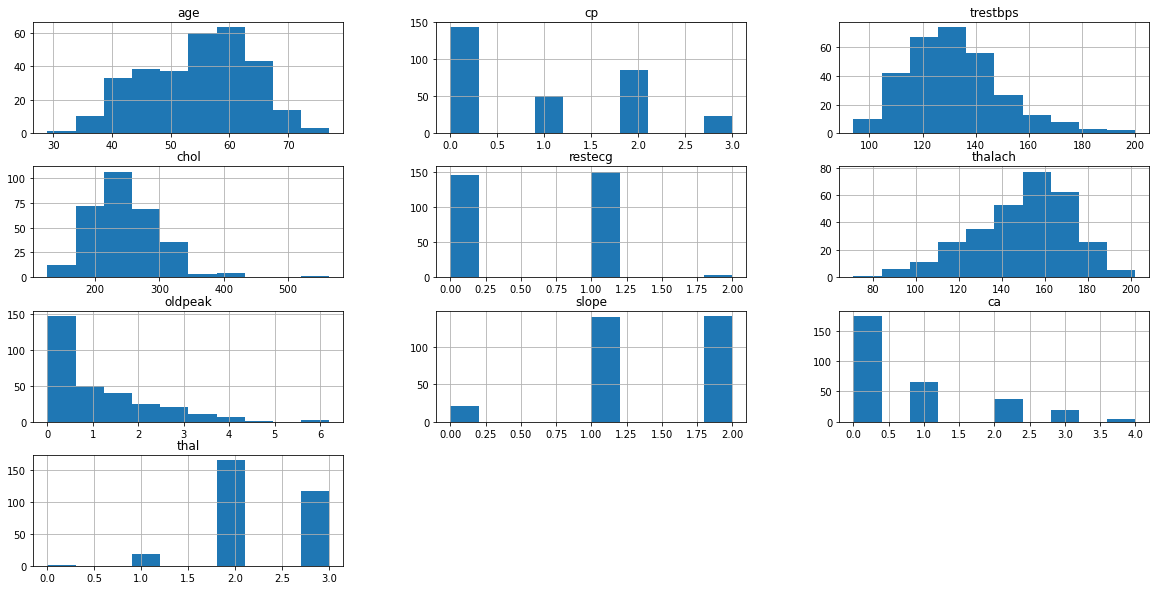

In [42]:
p = heart[continous_column].hist(figsize=(20,10))

<a id="outliers"></a>

# Outliers

Outliers are values which are 3 standard deviations away from mean.

We can identify outliers by:

1. Boxplot

2. Statistically using Z score


<AxesSubplot:xlabel='variable', ylabel='value'>

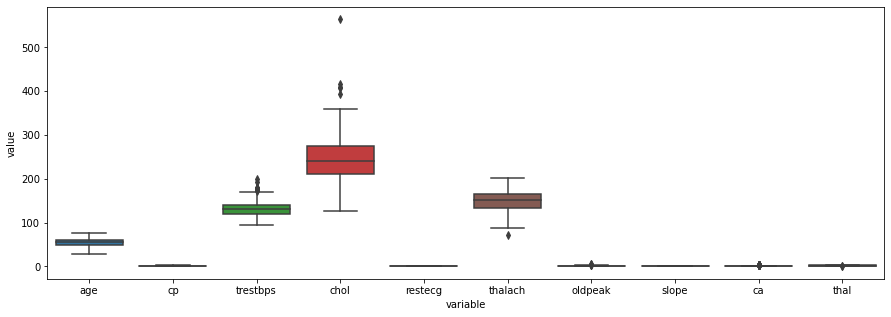

In [43]:
# Finding outliers
# Using sns boxplot
plt.figure(figsize=(15,5))
sns.boxplot(x='variable', y='value', data=pd.melt(heart[continous_column]))

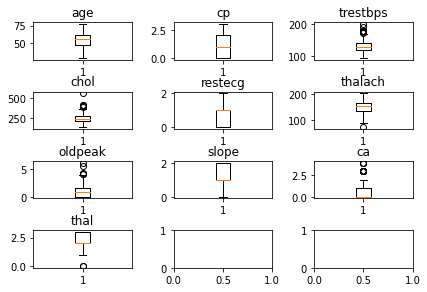

In [44]:
fig, ax = plt.subplots(nrows = 4, ncols = 3)
fig.tight_layout()
i=0
for row in range(0,4):
    for col in range(0,3):
        if i < len(continous_column):
            ax[row,col].boxplot(heart[continous_column[i]])
            ax[row,col].set_title(continous_column[i])
            i = i+1
plt.show()

Statistically we find outliers with help of Z score. Z score is also called standard score. This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean. More specifically, Z score tells how many standard deviations away a data point is from the mean.
How we will find out how many std deviation? We normally keep threshold to 3 std deviations.
How it looks like?

Z = X - mean/std dev

A normal distribution is shown below and it is estimated that

68% of the data points lie between +/- 1 standard deviation

95% of the data points lie between +/- 2 standard deviation

99.7% of the data points lie between +/- 3 standard deviation

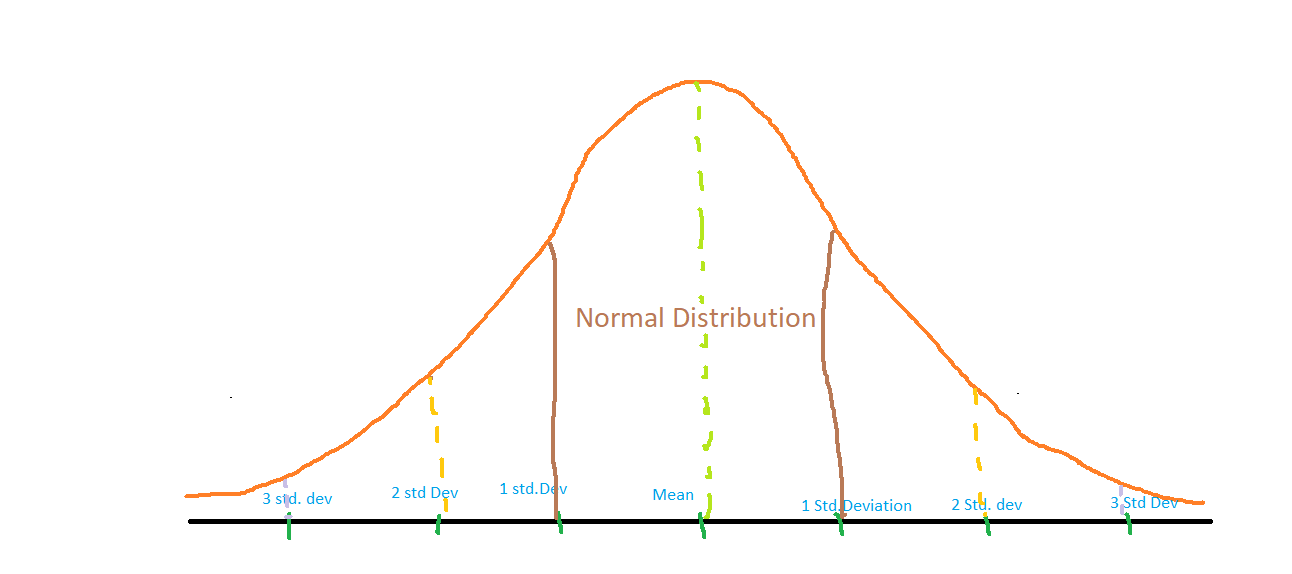

In [45]:
z=np.abs(stats.zscore(heart[continous_column]))

In [46]:
z[48]

array([0.15726042, 1.005911  , 0.20546305, 0.5903104 , 1.0025412 ,
       1.51185941, 0.8995441 , 0.97951442, 0.71491124, 3.78191608])

In [47]:
outliers = heart[z>3]

In [48]:
print(np.where(z>3))

(array([ 28,  48,  85,  92, 158, 163, 203, 219, 220, 222, 245, 247, 250,
       271, 280]), array([3, 9, 3, 8, 8, 8, 6, 3, 6, 2, 3, 2, 8, 5, 9]))


In [49]:
heart.shape

(302, 14)

In [50]:
outliers

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
204,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
221,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0


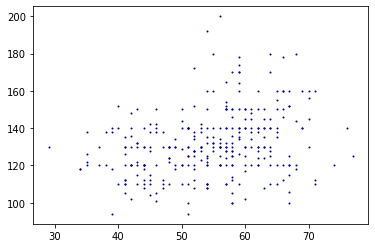

In [57]:
plt.scatter( 'age', 'trestbps', data=heart, color='darkblue',s=1)
#plt.scatter('age', 'thalach', data=heart, color='red', s=4)

<AxesSubplot:>

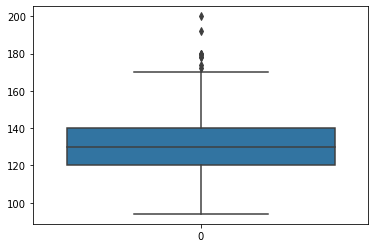

In [52]:
sns.boxplot(data=heart['trestbps'])

<AxesSubplot:>

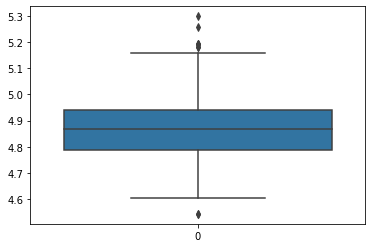

In [53]:
sns.boxplot(data=np.log(heart['trestbps']))